In [770]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [771]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [772]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [773]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [774]:
df.shape

(299, 13)

In [775]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [776]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [777]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [778]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [779]:
df.isnull().sum().sum()

np.int64(0)

In [780]:
df.duplicated().sum()

np.int64(0)

In [781]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

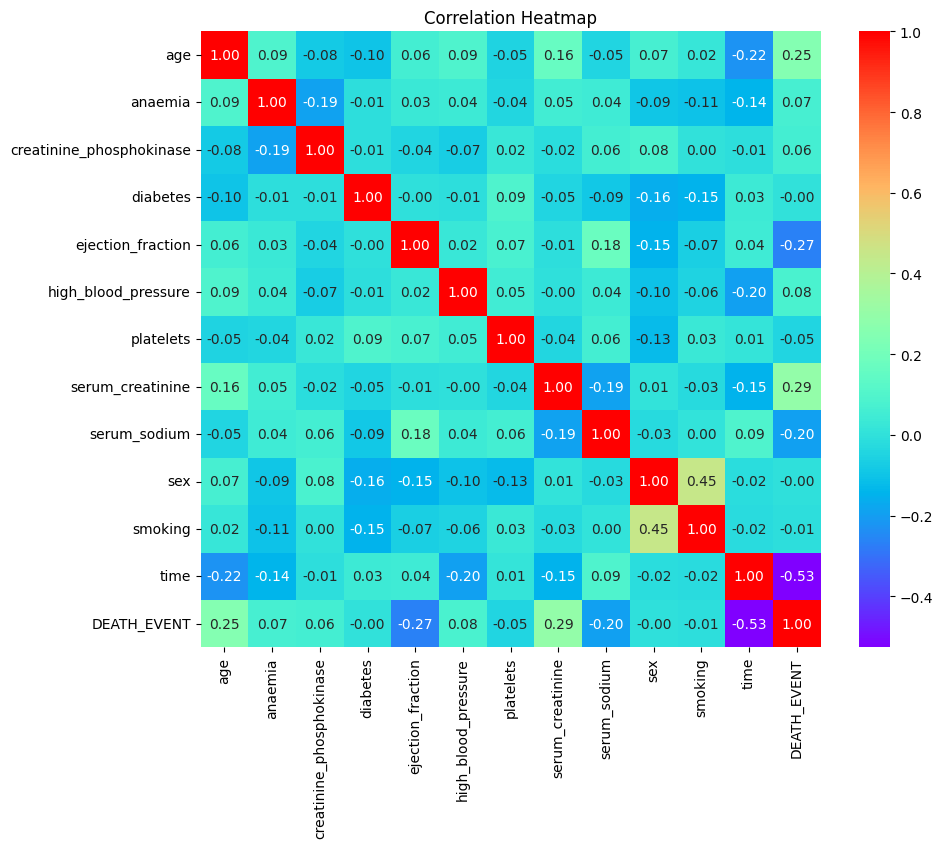

In [782]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),fmt='.2f',cmap='rainbow',annot=True)
plt.title('Correlation Heatmap')
plt.show()


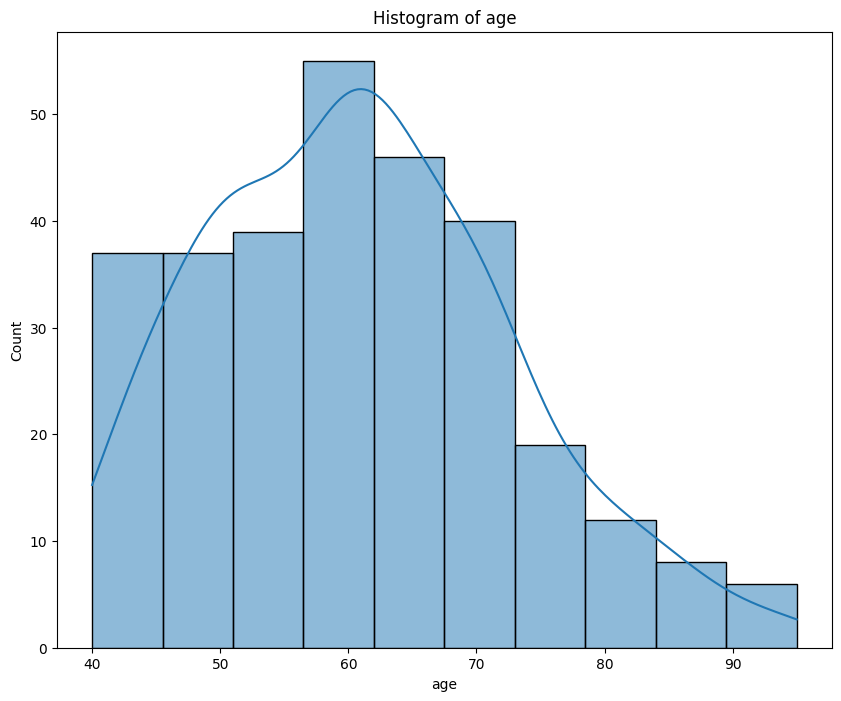

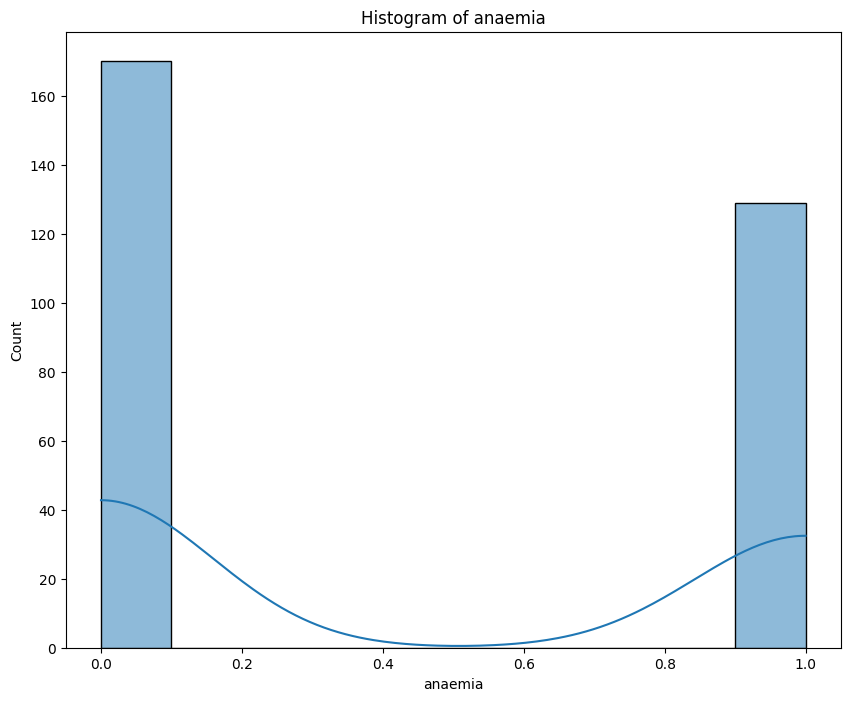

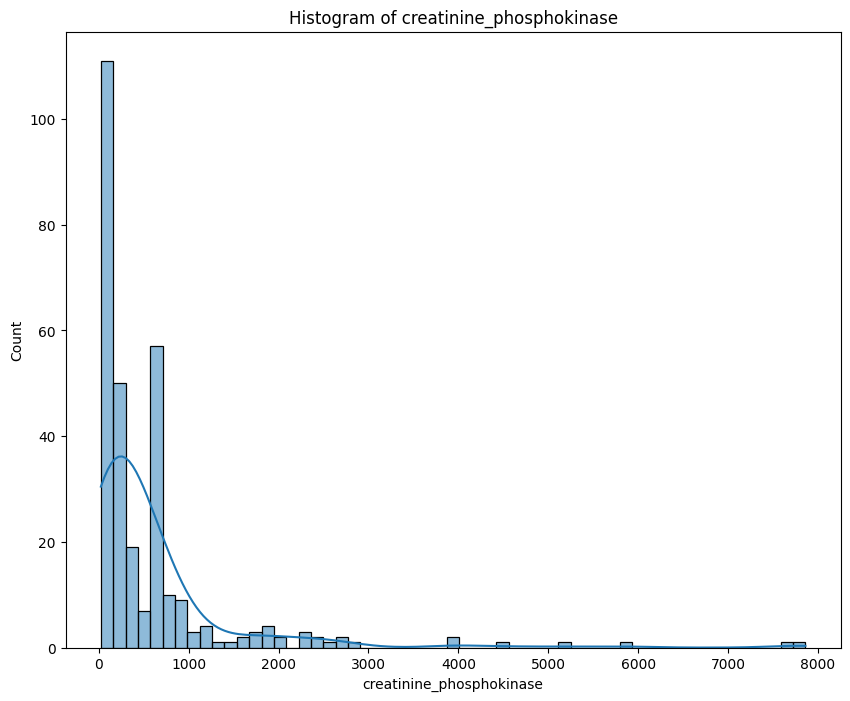

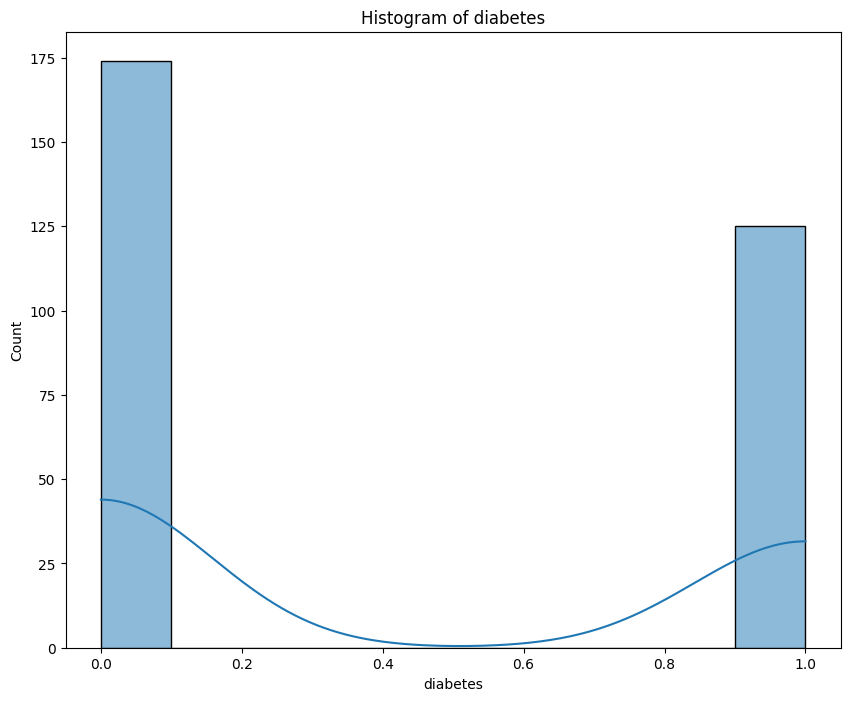

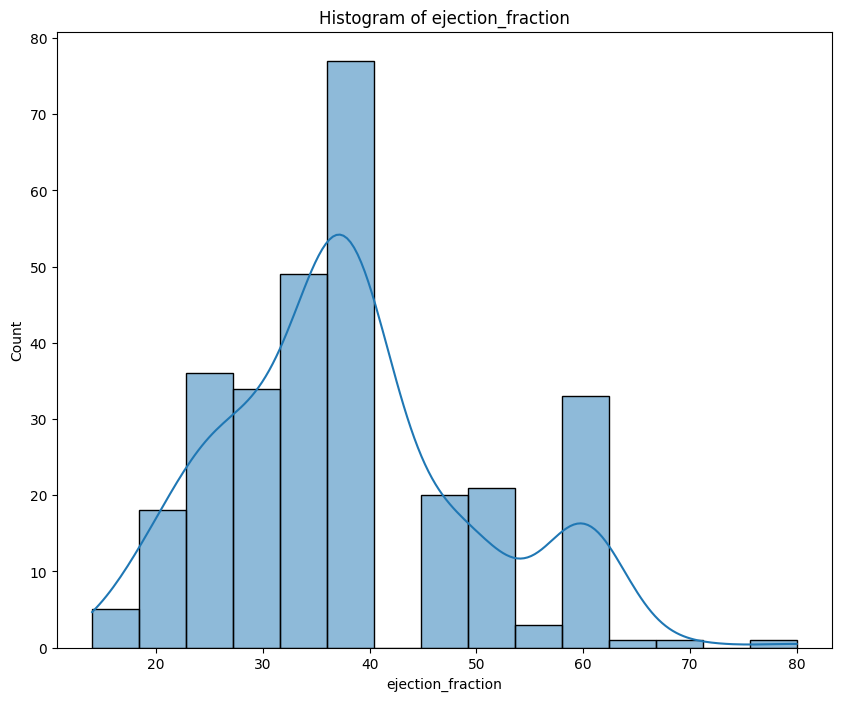

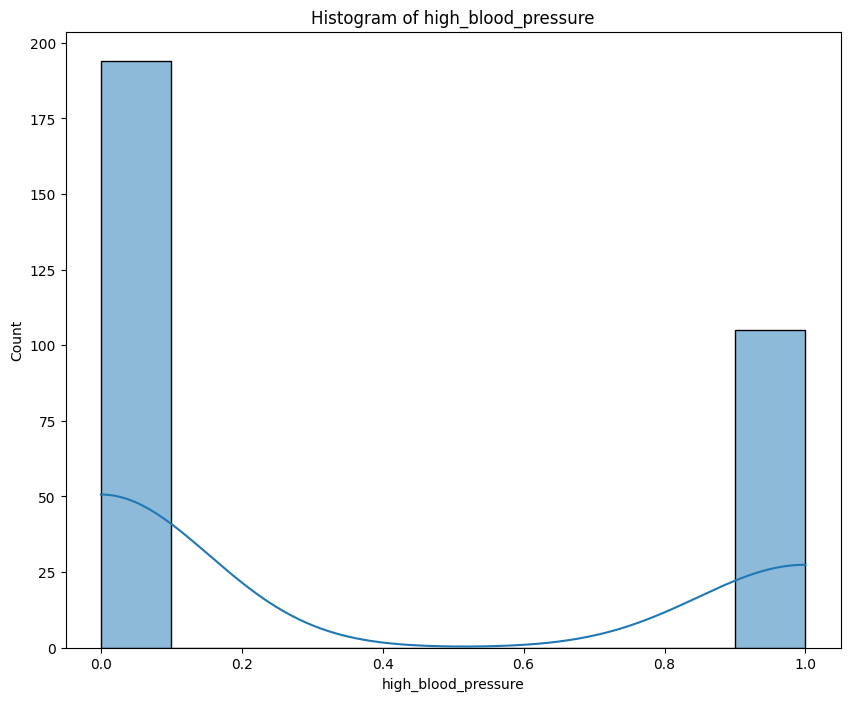

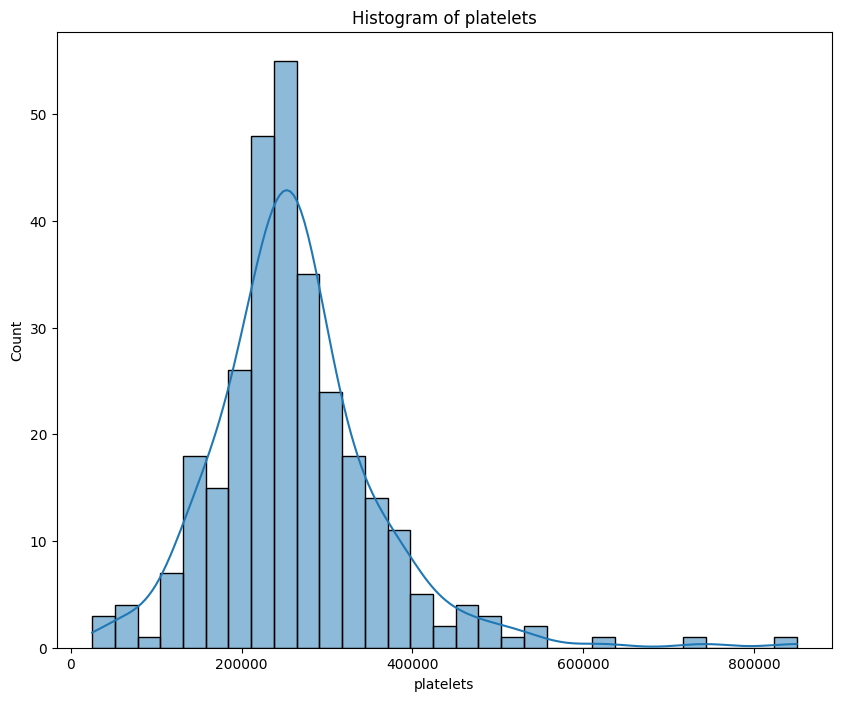

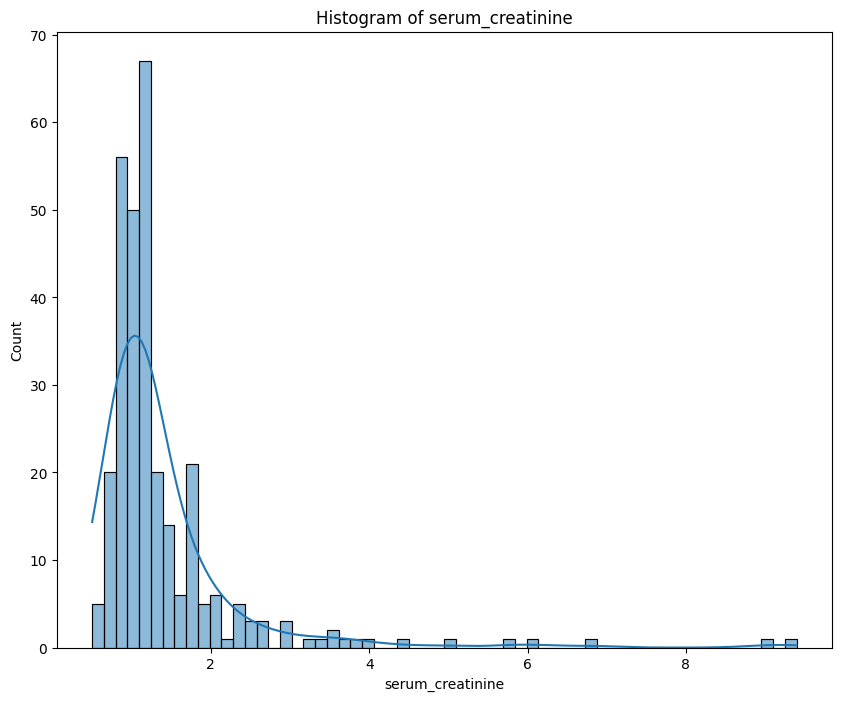

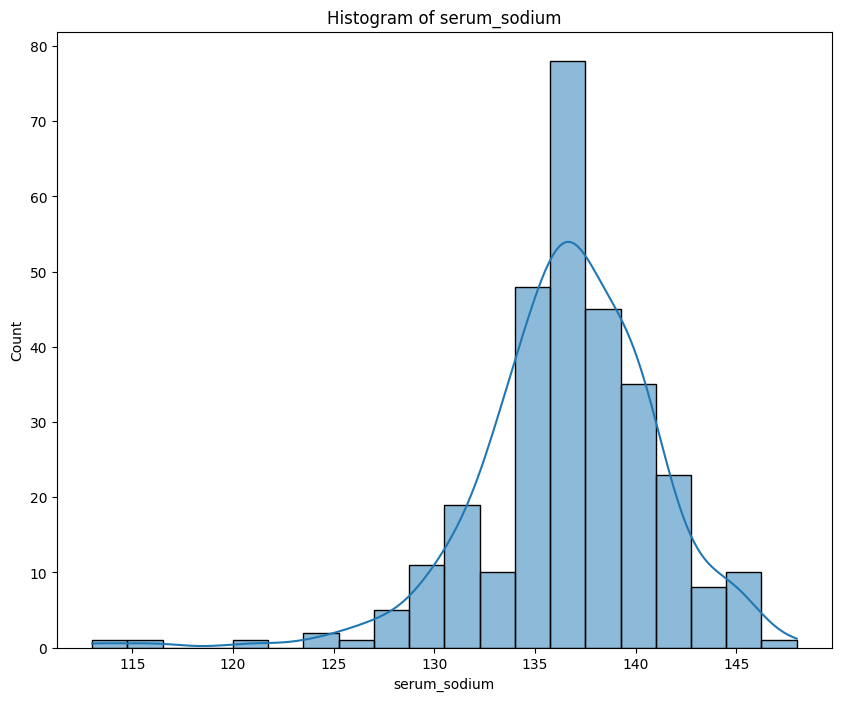

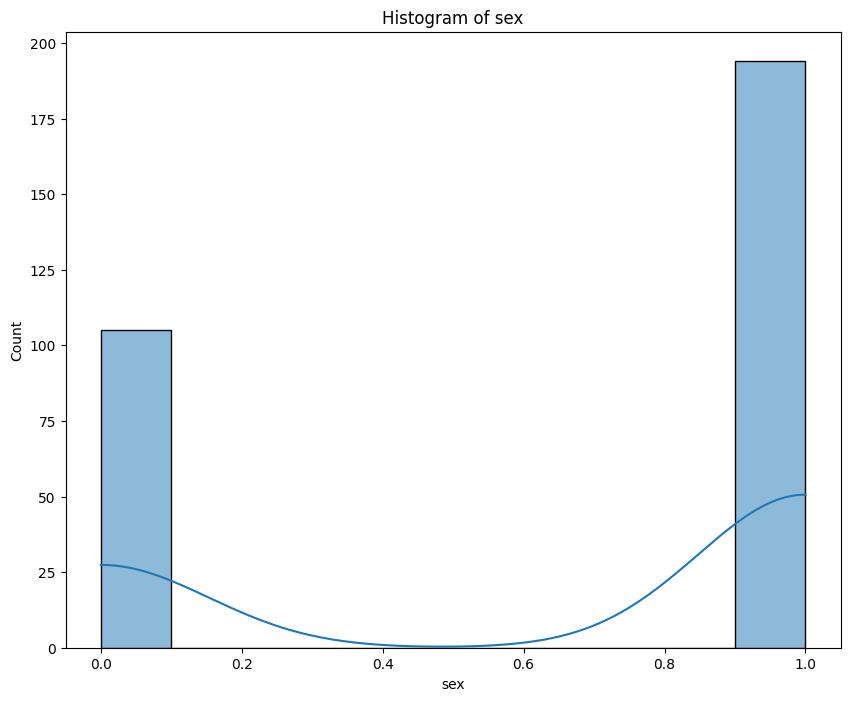

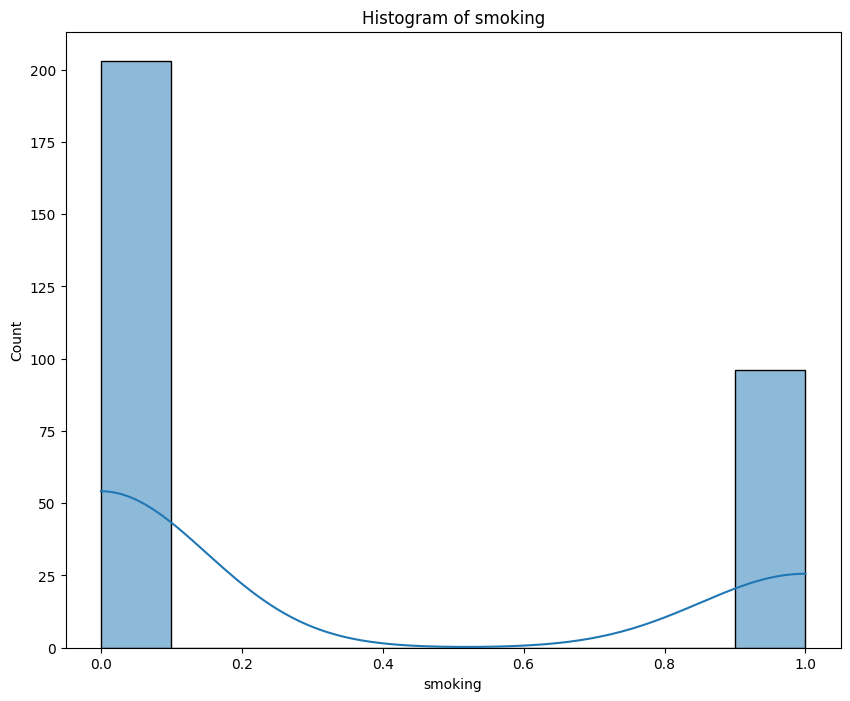

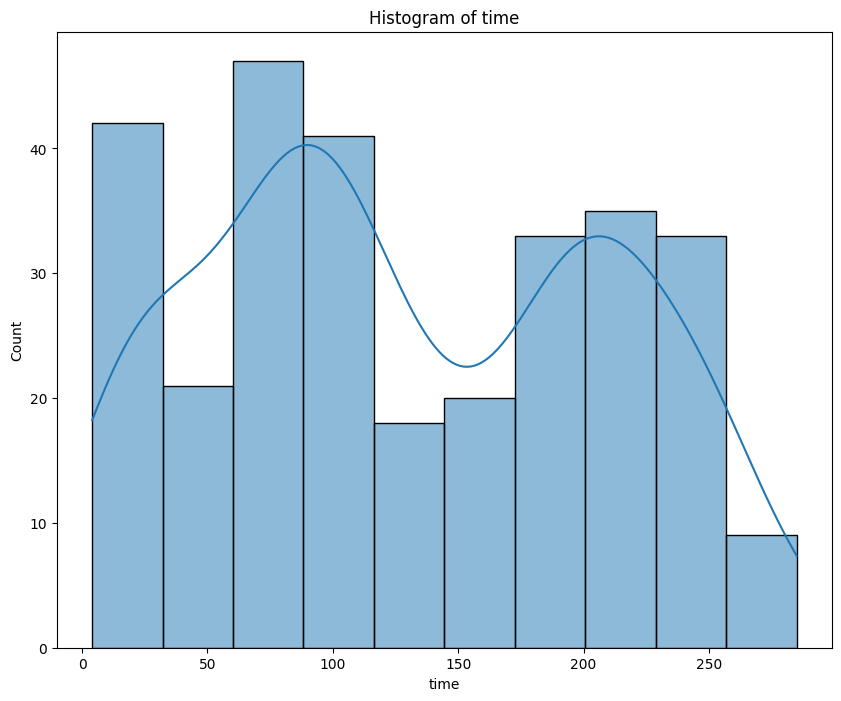

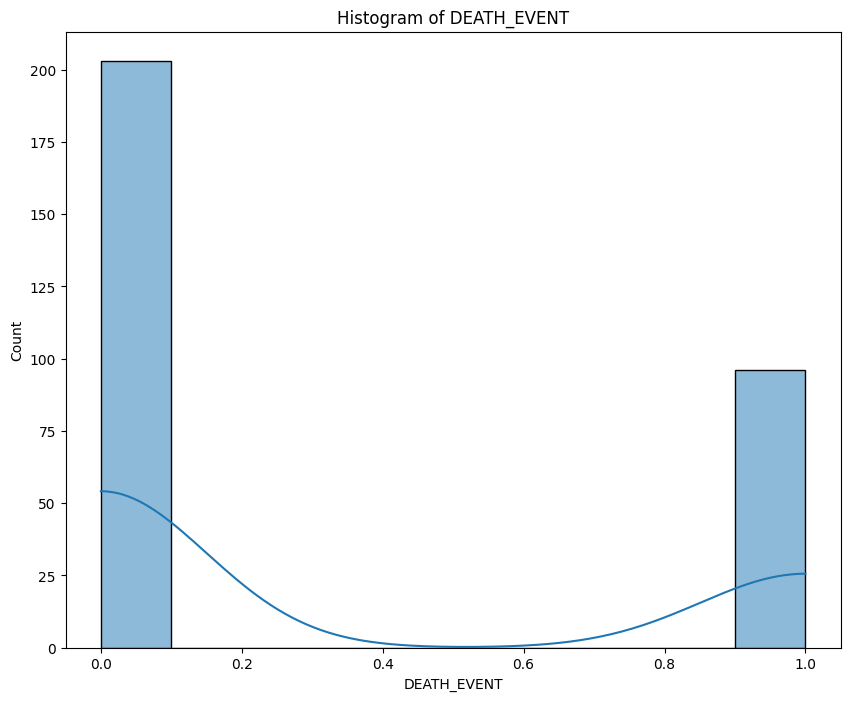

In [783]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(10, 8))
    plt.title(f'Histogram of {col}')
    sns.histplot(df[col], kde=True)
    plt.show()


In [784]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
lower= q1-1.5*IQR
upper = q3 + 1.5*IQR

In [785]:
df_clean = df[
    ~((df[numeric_cols] < lower) | (df[numeric_cols] > upper)).any(axis=1)
]

In [786]:
df = df_clean

In [787]:
num_cols = numeric_cols.drop('DEATH_EVENT')

In [788]:
X = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

In [789]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [790]:
preprocessor = ColumnTransformer(
    transformers=[
        ('stand',StandardScaler(),num_cols)
    ],
    remainder='passthrough'
)

In [791]:
preprocessor.set_output(transform='pandas')

,transformers,"[('stand', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [792]:
X_test_transformed = preprocessor.fit_transform(X_test)
X_train_transformed = preprocessor.transform(X_train)

In [793]:
X_train_transformed.columns

Index(['stand__age', 'stand__anaemia', 'stand__creatinine_phosphokinase',
       'stand__diabetes', 'stand__ejection_fraction',
       'stand__high_blood_pressure', 'stand__platelets',
       'stand__serum_creatinine', 'stand__serum_sodium', 'stand__sex',
       'stand__smoking', 'stand__time'],
      dtype='object')

In [794]:
y_train.value_counts()

DEATH_EVENT
0    130
1     49
Name: count, dtype: int64

In [795]:
lgr = LogisticRegression(max_iter=1000,class_weight='balanced')
lgr.fit(X_train_transformed,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [796]:
y_pred_lgr = lgr.predict(X_test_transformed)
y_prob_lgr = lgr.predict_proba(X_test_transformed)[:, 1]
print("Prediction done")

Prediction done


In [797]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lgr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgr))
print("Classification Report:\n", classification_report(y_test, y_pred_lgr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lgr))

Logistic Regression Accuracy: 0.7555555555555555
Confusion Matrix:
 [[27  6]
 [ 5  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.54      0.58      0.56        12

    accuracy                           0.76        45
   macro avg       0.69      0.70      0.70        45
weighted avg       0.76      0.76      0.76        45

ROC-AUC: 0.8333333333333333


In [798]:
svm = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=42
)

svm.fit(X_train_transformed, y_train)

y_pred_svm = svm.predict(X_test_transformed)
y_prob_svm = svm.predict_proba(X_test_transformed)[:, 1]

In [799]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))

SVM Accuracy: 0.7333333333333333
Confusion Matrix:
 [[27  6]
 [ 6  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.50      0.50      0.50        12

    accuracy                           0.73        45
   macro avg       0.66      0.66      0.66        45
weighted avg       0.73      0.73      0.73        45

ROC-AUC: 0.861111111111111


In [800]:
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance'
)

knn.fit(X_train_transformed, y_train)

y_pred_knn = knn.predict(X_test_transformed)
y_prob_knn = knn.predict_proba(X_test_transformed)[:, 1]

In [801]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_knn))

KNN Accuracy: 0.7555555555555555
Confusion Matrix:
 [[31  2]
 [ 9  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85        33
           1       0.60      0.25      0.35        12

    accuracy                           0.76        45
   macro avg       0.69      0.59      0.60        45
weighted avg       0.73      0.76      0.72        45

ROC-AUC: 0.6767676767676767


In [802]:
nb = GaussianNB()
nb.fit(X_train_transformed, y_train)

,priors,None
,var_smoothing,1e-09


In [803]:
y_pred_nb = nb.predict(X_test_transformed)
y_prob_nb = nb.predict_proba(X_test_transformed)[:, 1]

In [804]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_nb))

Naive Bayes Accuracy: 0.7111111111111111
Confusion Matrix:
 [[28  5]
 [ 8  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.44      0.33      0.38        12

    accuracy                           0.71        45
   macro avg       0.61      0.59      0.60        45
weighted avg       0.69      0.71      0.70        45

ROC-AUC: 0.8409090909090909


In [805]:
dt = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
    max_depth=5              
)

dt.fit(X_train_transformed, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [806]:
y_pred_dt = dt.predict(X_test_transformed)
y_prob_dt = dt.predict_proba(X_test_transformed)[:, 1]

In [807]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))

Decision Tree Accuracy: 0.8444444444444444
Confusion Matrix:
 [[30  3]
 [ 4  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.73      0.67      0.70        12

    accuracy                           0.84        45
   macro avg       0.80      0.79      0.80        45
weighted avg       0.84      0.84      0.84        45

ROC-AUC: 0.6313131313131313


In [808]:
param_grid_lgr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lgr = GridSearchCV(
    lgr,
    param_grid_lgr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_lgr.fit(X_train_transformed, y_train)

best_lgr = grid_lgr.best_estimator_


In [809]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(
    svm,
    param_grid_svm,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_svm.fit(X_train_transformed, y_train)

best_svm = grid_svm.best_estimator_


In [810]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan vs Euclidean
}

grid_knn = GridSearchCV(
    knn,
    param_grid_knn,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_knn.fit(X_train_transformed, y_train)

best_knn = grid_knn.best_estimator_


In [811]:
from sklearn.naive_bayes import GaussianNB

param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

grid_nb = GridSearchCV(
    GaussianNB(),
    param_grid_nb,
    cv=5,
    scoring='roc_auc'
)

grid_nb.fit(X_train_transformed, y_train)

best_nb = grid_nb.best_estimator_


In [812]:
param_grid_dt = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(
    dt,
    param_grid_dt,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_dt.fit(X_train_transformed, y_train)

best_dt = grid_dt.best_estimator_


In [813]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

In [814]:
print("Best Logistic Regression")
evaluate(best_lgr, X_test_transformed, y_test)

print("Best SVM")
evaluate(best_svm, X_test_transformed, y_test)

print("Best KNN")
evaluate(best_knn, X_test_transformed, y_test)

print("Best Naive Bayes")
evaluate(best_nb, X_test_transformed, y_test)

print("Best Decision Tree")
evaluate(best_dt, X_test_transformed, y_test)


Best Logistic Regression
Accuracy: 0.7333333333333333
Confusion Matrix:
 [[27  6]
 [ 6  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.50      0.50      0.50        12

    accuracy                           0.73        45
   macro avg       0.66      0.66      0.66        45
weighted avg       0.73      0.73      0.73        45

ROC-AUC: 0.8535353535353536
Best SVM
Accuracy: 0.7333333333333333
Confusion Matrix:
 [[27  6]
 [ 6  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.50      0.50      0.50        12

    accuracy                           0.73        45
   macro avg       0.66      0.66      0.66        45
weighted avg       0.73      0.73      0.73        45

ROC-AUC: 0.8434343434343434
Best KNN
Accuracy: 0.7555555555555555
Confusion Matrix:
 [[32  1]
 [10  2]